In [13]:
#print('hello world')

'''
Belousov-Zhabotinsky reaction:
A non-equilibrium chemical oscillator w/ components that exhibit periodic changes in concetration
'''

# imports
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display
import cv2 as cv
from PIL import Image


col, row = 600, 450 # Dimensions of agar and image
grid = [] # this will contain a pair of arrays, where each array contains a (col x row)

# this section imports, resizes, and thresholds any image
I = Image.open('Pittscript.png')
I = np.array(cv.resize(np.array(I),(600,450)))
#I = np.array(cv.threshold(I,127,255,cv.THRESH_BINARY))
I = I[:,:,1]/255
#print(I.shape)


alpha, beta, gamma = .7, 1, 1
# these are reaction rates, which control the reaction rate for the
# three chemical reactions modeled here:
#    A + B -> 2A has a reaction rate of (alpha)
#    B + C -> 2B has a reaction rate of (beta)
#    C + D -> 2C has a reaction rate of (gamma)

def update_grid(p, grid):
    
    q = (p + 1) % 2 # determine whether to update t or t+1 (t+1 becomes t and so on). 
                    # q = 0, 1, 0, 1, 0, 1, ...
    #print(p, q)
    #s = np.zeros((3, row, col))
    #kernel = np.ones((3,3))/9 # 3x3 averaging kernel | 1/9  1/9  1/9 | sums to 1
                              #                       | 1/9  1/9  1/9 |
                              #                       | 1/9  1/9  1/9 |
    s = np.zeros((3, row, col))
    kernel = np.ones((3,3))/9
    
    num_reactions = 3
    for reaction in range(num_reactions):
        s[reaction] = convolve2d(grid[p, reaction], kernel, mode='same', boundary='symm')
    
    # reaction equations
    grid[q,0] = s[0] + s[0]*(alpha*s[1] - gamma*s[2]) # A + A(A_production_rate*B - C_production_rate*C)
    grid[q,1] = s[1] + s[1]*(beta*s[2] - alpha*s[0]) # amount of C - amount of A
    grid[q,2] = s[2] + s[2]*(gamma*s[0] - beta*s[1]) # amount of A - amount of B
    # s[0] := reaction A
    # s[1] := reaction B
    # s[2] := reaction C
    
    np.clip(grid[q], 0, 1, grid[q])
    return grid

#grid = np.random.random((-1,1), size=(2, 3, row, col))
grid = np.ones(shape=(2, 3, row, col)) # this makes every other chemical present elsewhere on the agar
mr = int(round(row/2))
mc = int(round(col/2))
grid[:,0, mr:mr+30, mc:mc+30] = .8# np.random.random(size=(50, 50))
grid[:,1, mr:mr+30, mc:mc+30] = .8# np.random.random(size=(50, 50))
grid[:,2, mr:mr+30, mc:mc+30] = .8# np.random.random(size=(50, 50))

#grid[:, 0, mr, mc] = np.random.random()
#grid[:, 1, mr, mc] = np.random.random()
#grid[:, 2, mr, mc] = np.random.random()

#grid[:,0, mr+10, mc+10] = np.random.random()
#grid[:,1, mr+10, mc+10] = np.random.random()
#grid[:,2, mr+10, mc+10] = np.random.random()

#plt.imshow(grid[0,1])

#print(grid[0][0][:,:].shape)
#print()

#grid[0][0][:,:] = grid[0][0][:,:]*I
#grid[0][1][:,:] = grid[0][0][:,:]*I
#grid[0][2][:,:] = grid[0][0][:,:]*I

#grid[1][0][:,:] = grid[0][0][:,:]*I
#grid[1][1][:,:] = grid[0][0][:,:]*I
#grid[1][2][:,:] = grid[0][0][:,:]*I

#print(I)


# size = (a, b, c, d)
# a <= b, a < 0,

#print(grid)

fig, ax = plt.subplots()
im = ax.imshow(grid[0, 0], cmap = 'jet')
ax.axis('off')

def animate(i, grid):
    grid = update_grid(i % 2, grid)
    im.set_array(grid[i % 2, 0])
    return im

anim = FuncAnimation(fig, animate, frames=200, interval=30, blit=False, fargs=(grid,))
video = anim.to_html5_video()
plt.close()
display.HTML(video)

In [11]:

# imports
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display
import cv2 as cv
from PIL import Image


I = Image.open('pittscript.png')
I = np.array(cv.resize(np.array(I),(600,450)))
#I = np.array(cv.threshold(I,127,255,cv.THRESH_BINARY))
I = I[:,:,1]/255
#print(I.shape)


# Width, height of the image
col, row = 600, 450
grid = []
alpha, beta, gamma = .7, 1, 1 # .7, 1, 1 good for pitt logo

def update_grid(p,grid):

    # reacalculate the chemical concentrations across the grid over 1 time step
    q = (p + 1) % 2
    #print(q)
    s = np.zeros((3, row, col))
    m = np.ones((3,3))/9 # 3x3 averaging kernel
    for k in range(3):
        s[k] = convolve2d(grid[p,k], m, mode='same', boundary='symm')
    
    # reaction equations
    grid[q,0] = s[0] + s[0]*(alpha*s[1] - gamma*s[2])
    grid[q,1] = s[1] + s[1]*(beta*s[2] - alpha*s[0])
    grid[q,2] = s[2] + s[2]*(gamma*s[0] - beta*s[1])

    np.clip(grid[q], 0, 1, grid[q])
    return grid

grid = np.ones(shape=(2, 3, row, col)) # this makes every other chemical present elsewhere on the agar
mr = int(round(row/2))

#print(grid[0][0][:,:].shape)
grid[:,:,100:120,100:120] = .2



#grid[:,:,:,:] = grid[0,0,:,:]*I

fig, ax = plt.subplots()
im = ax.imshow(grid[0, 0], cmap = 'jet')
ax.axis('off')

def animate(i, grid):
    grid = update_grid(i % 2, grid)
    im.set_array(grid[i % 2, 0])
    return im

anim = FuncAnimation(fig, animate, frames=300, interval=30, blit=False, fargs=(grid,))
video = anim.to_html5_video()
plt.close()
display.HTML(video)

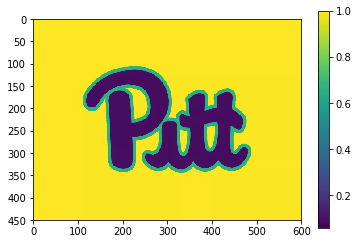

In [40]:
from collections import Counter
A = (list(I))
plt.imshow(A)
plt.colorbar()
